In [24]:
import sys
sys.path.append('../Codes/')
import numpy as np
import matplotlib.pyplot as plt
from Immuno_models import*
#from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../Dropbox/Research/Evolution_Immune_System/Text_files/'

N_A = 6.02214076e23
k_BT = 1.380649e-23*293
style.use('seaborn-paper')
print(style.available)
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


# The Energy Matrix

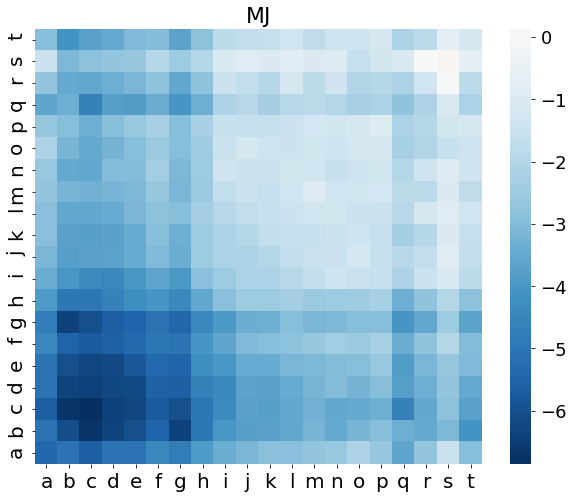

In [25]:
M2 = np.loadtxt('../../../../Dropbox/Research/Evolution_Immune_System/Text_files/MJ2.txt', skiprows= 1, usecols=range(1,21)).tolist()
Alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
fig, ax = plt.subplots(figsize=(10,8))
plot_energy_matrix(Energy_Matrix=M2, Alphabet=Alphabet, title='MJ', ax = ax)


## Distribution of fitness effects

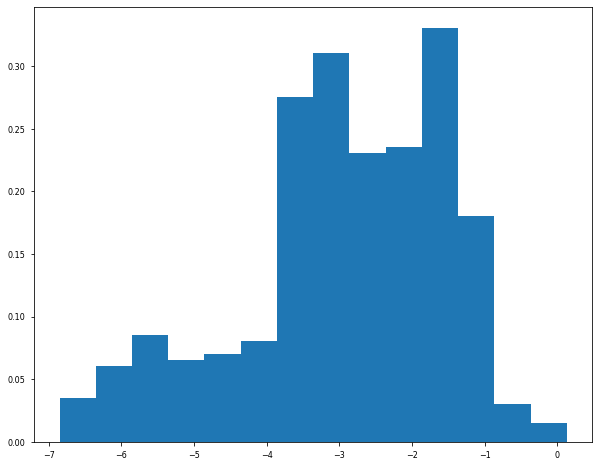

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
linear_M = np.reshape(M2, (20*20,1))

ax.hist(linear_M, density = True, bins = 'auto');


## Master sequence energy distribution

CPU times: user 169 ms, sys: 52.5 ms, total: 221 ms
Wall time: 291 ms


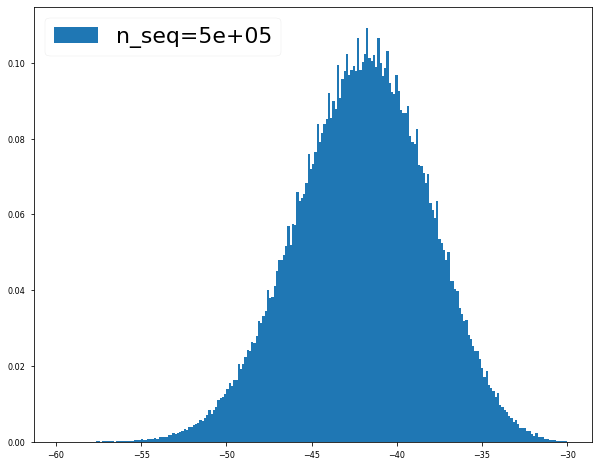

In [27]:
%%time
L = 9
n_seqs = np.array([5e5])
fig, ax = plt.subplots(figsize=(10,8))

for n_seq in n_seqs:
    master_sequences_energies = pickle.load(open(Text_files_path+'master_sequence_energies_MJ2_L-%d_n_seq-%d.pkl'%(int(L), int(n_seq)), 'rb'))
    ax.hist(master_sequences_energies, density = True, bins = 'auto', label = 'n_seq=%.e'%(n_seq));
ax.legend(loc = 0, fontsize = 22)

## Range of energies

CPU times: user 154 ms, sys: 49.3 ms, total: 203 ms
Wall time: 261 ms


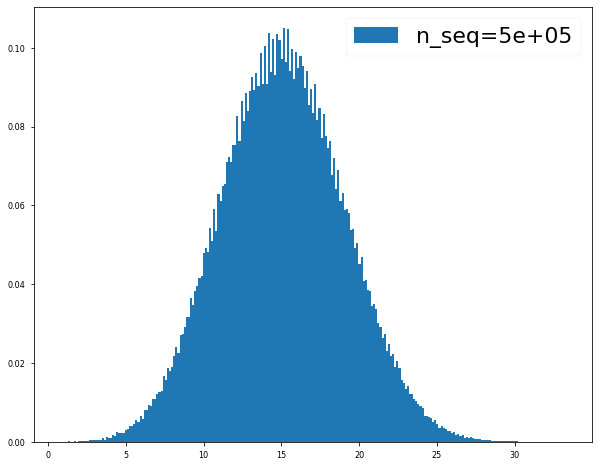

In [28]:
%%time
L = 9
n_seqs = np.array([5e5])
fig, ax = plt.subplots(figsize=(10,8))

for n_seq in n_seqs:
    range_energies = pickle.load(open(Text_files_path+'range_energies_MJ2_L-%d_n_seq-%d.pkl'%(int(L), int(n_seq)), 'rb'))
    ax.hist(range_energies, density = True, bins = 'auto', label = 'n_seq=%.e'%(n_seq));
ax.legend(loc = 0, fontsize = 22)

## Sequences generated from the MS

In [29]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5, 1e6])
Array_Sequences = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    Array_Sequences.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)
    
Array_Sequences = np.array(Array_Sequences, dtype = Sequence)

Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
CPU times: user 11.5 s, sys: 2.94 s, total: 14.4 s
Wall time: 15.9 s


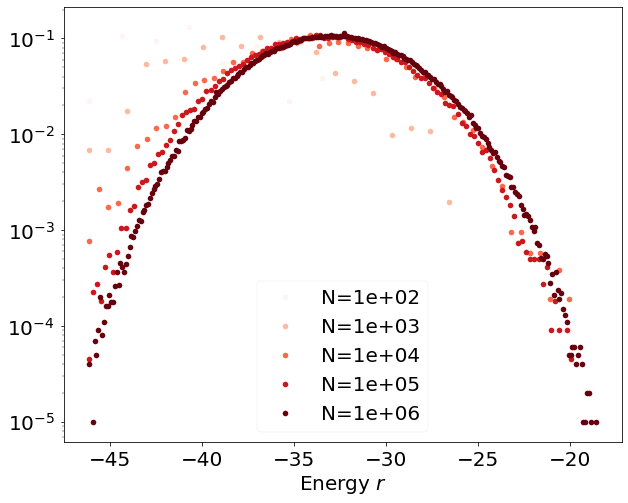

In [30]:
for k, Sequences in enumerate(Array_Sequences):
    fig1, ax1 = plt.subplots(1,1,figsize=(10,8))
    distances = plot_histogram_hamming_distance(Sequences = Sequences, ax = ax1)
    plt.close()
    
fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = plt.cm.Reds(np.linspace(0,1,len(n_seqs)))
for k, Sequences in enumerate(Array_Sequences):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[k], n_seq = n_seqs[k], density = True, ax = ax)
#ax.set_xlim(np.min(energies),np.min(energies)+8 )
#ax.set_yscale('linear')

/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/robertomorantovar/anaconda3/lib/python3.8/s

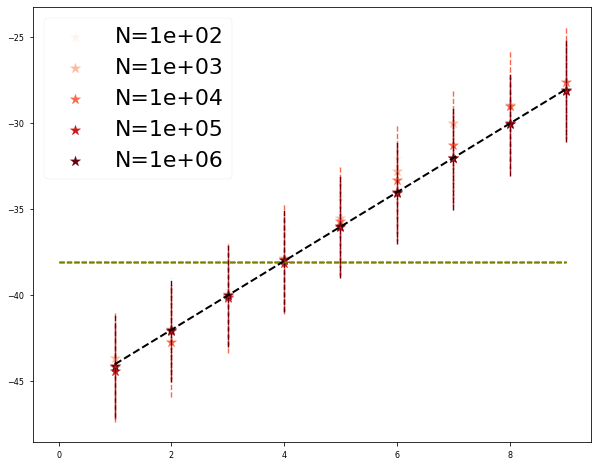

In [38]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))
ds = np.array(range(1,10))
for k, Sequences in enumerate(Array_Sequences):
    #calculate mean energy given d
    mean_energies_given_d = np.array([])

    for d in ds:
        temp_array = [Sequences[i].energy for i in range(int(len(Sequences))) if (Sequences[i].hamming_distance == d)]
        mean_energy_given_d = np.mean(temp_array)
        var_energy_given_d = np.var(temp_array)
        mean_energies_given_d = np.append(mean_energies_given_d, mean_energy_given_d)
        
    #___________________________________________
    #plot_scatter_hamming_distance_energy(distances = distances, energies = energies, color = 'steelblue', ax = ax)
    #plot_scatter_hamming_distance_energy(distances = distances_left_tail_8, energies = energies_left_tail_8, color = 'olivedrab', ax = ax)
    ax.scatter(range(1,10), mean_energies_given_d, color = colors[k], s = 120, marker = '*', label = 'N=%.e'%(n_seqs[k]))
    ax.vlines(range(1,10), mean_energies_given_d-np.sqrt(var_energy_given_d), mean_energies_given_d+np.sqrt(var_energy_given_d), color = colors[k], linestyle = '--')
    ax.hlines(np.min(energies)+8, 0, 9, color = 'olive', linestyle = '--')
    ax.legend(loc = 0, fontsize = 22)
    
#-------------------------------------------------
# Fit the mean value to a linear function
popt, pcov = curve_fit(my_linear_func, ds, mean_energies_given_d)

ax.plot(ds, my_linear_func(ds, *popt), linewidth = 2, linestyle = '--', color = 'black')


## Sequences generated randomly

In [32]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5, 1e6])
Array_Sequences_random = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_random_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    for Sequence_i in Sequences:
        Sequence_i.hamming_distance = hamming_distance(Sequence_i.sequence, Sequence_i.complementary_sequence)
    Array_Sequences_random.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)

Array_Sequences_random = np.array(Array_Sequences_random, dtype = Sequence)



Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
CPU times: user 13.2 s, sys: 221 ms, total: 13.4 s
Wall time: 13.4 s


array(['ccccbbcbb', 'ccccbbcbb', 'ccccbbcbb', 'ccccbbcbb', 'ccccbbcbb'],
      dtype='<U32')

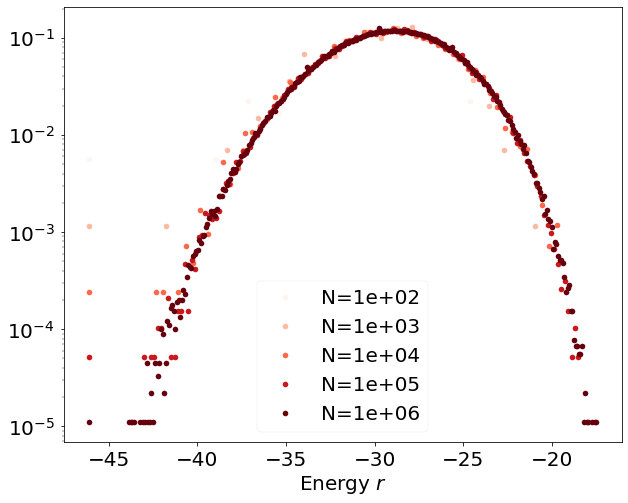

In [33]:
for k, Sequences in enumerate(Array_Sequences_random):
    fig1, ax1 = plt.subplots(1,1,figsize=(10,8))
    distances = plot_histogram_hamming_distance(Sequences = Sequences, ax = ax1)
    plt.close()

fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = plt.cm.Reds(np.linspace(0,1,len(n_seqs)))
min_seqs = np.array([])
for k, Sequences in enumerate(Array_Sequences_random):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[k], n_seq = n_seqs[k], density = True, ax = ax)
    min_energy = np.min(energies)
    min_seqs = np.append(min_seqs, [i.sequence for i in Sequences if (i.energy == min_energy)])
    
min_seqs
#ax.set_yscale('linear')

In [34]:
20**9

512000000000

/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


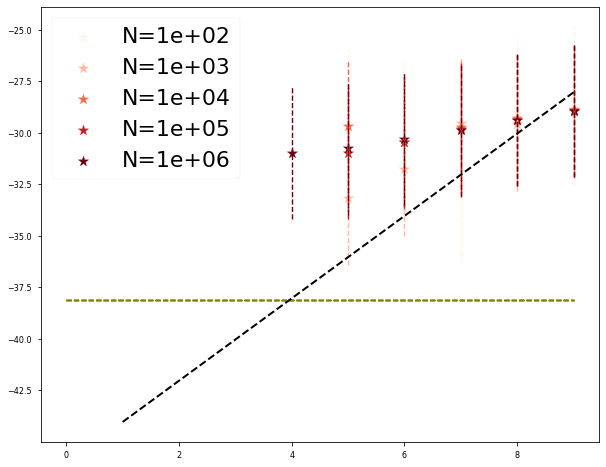

In [39]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))

for k, Sequences in enumerate(Array_Sequences_random):
    #calculate mean energy given d
    mean_energies_given_d = np.array([])

    for d in range(1,10):
        temp_array = [Sequences[i].energy for i in range(int(len(Sequences))) if (Sequences[i].hamming_distance == d)]
        mean_energy_given_d = np.mean(temp_array)
        var_energy_given_d = np.var(temp_array)
        mean_energies_given_d = np.append(mean_energies_given_d, mean_energy_given_d)
    #-------------------------------------------------- 
    #___________________________________________
    #plot_scatter_hamming_distance_energy(distances = distances, energies = energies, color = 'steelblue', ax = ax)
    #plot_scatter_hamming_distance_energy(distances = distances_left_tail_8, energies = energies_left_tail_8, color = 'olivedrab', ax = ax)
    ax.scatter(range(1,10), mean_energies_given_d, color = colors[k], s = 120, marker = '*', label = 'N=%.e'%(n_seqs[k]))
    ax.vlines(range(1,10), mean_energies_given_d-np.sqrt(var_energy_given_d), mean_energies_given_d+np.sqrt(var_energy_given_d), color = colors[k], linestyle = '--')
    ax.hlines(np.min(energies)+8, 0, 9, color = 'olive', linestyle = '--')
    ax.legend(loc = 0, fontsize = 22)

ax.plot(ds, my_linear_func(ds, *popt), linewidth = 2, linestyle = '--', color = 'black')

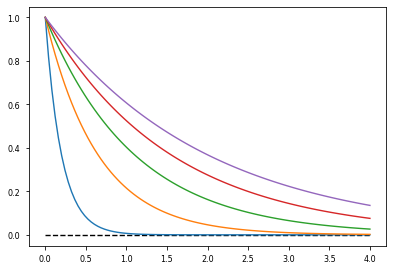

In [62]:
Ts = np.linspace(2e-1, 2, 5)
E = np.linspace(0,4,100)
for T in Ts:
    plt.plot(E, np.exp(-(1/T)*(E)))
plt.hlines(0, 0, 4, linestyle = '--', color = 'k')
#plt.yscale('log')